In [1]:
%pip install agentpy emukit GPy 

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Model Design
import agentpy as ap 
import numpy as np 
from boids_model import BoidsModel

# Visualisation
from visualisation import animation_plot, animation_plot_single
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [11]:
# Parameter definitions
parameters2D = {
    'size': 50,
    'seed': 123,
    'steps': 400,
    'ndim': 2,
    'population': 400,
    'inner_radius': 5,
    'outer_radius': 12,
    'border_distance': 15,
    'cohesion_strength': 0.005,
    'seperation_strength': 0.1,
    'alignment_strength': 0.3,
    'border_strength': 0.5
}

# parameters2D = {
#     'size': 50,
#     'seed': 123,
#     'steps': 200,
#     'ndim': 2,
#     'population': 200,
#     'inner_radius': 3,
#     'outer_radius': 10,
#     'border_distance': 10,
#     'cohesion_strength': 0.005,
#     'seperation_strength': 0.1,
#     'alignment_strength': 0.3,
#     'border_strength': 0.5
# }

In [12]:
parameters_multi = dict(parameters2D)
parameters_multi.update({
    'cohesion_strength': ap.Values(0.005, 0.01, 0.05, 0.1),
    'seperation_strength': ap.Values(0.05, 0.1, 0.3, 0.5),
    'alignment_strength': ap.Values(0.1, 0.3, 0.5, 0.7),
    'border_strength': ap.Values(0.1, 0.3, 0.5, 0.7)
})
sample = ap.Sample(parameters_multi)

In [13]:
exp = ap.Experiment(BoidsModel, sample, iterations=3, record=True)
results = exp.run()

Scheduled runs: 768
Completed: 56, estimated time remaining: 8:40:144

In [ ]:
results.save()

Data saved to ap_output/BoidsModel_3


In [10]:
results = ap.DataDict.load('BoidsModel')

Loading from directory ap_output/BoidsModel_3/
Loading parameters_sample.csv - Successful
Loading parameters_constants.json - Successful
Loading reporters.csv - Successful
Loading info.json - Successful
Loading variables_BoidsModel.csv - 

Successful
Loading parameters_log.json - Successful


In [42]:
results.reporters

seed  \
sample_id iteration                                            
0         0           38151356693563145563839572916692094389   
          1          129896386350439104469743396241879195701   
          2          247300833332662290756255669384610199781   
1         0           50643080413437459039891721527947746584   
          1          136549452082586503894296593361224987154   
...                                                      ...   
254       1          141839946951262878138403903885345635124   
          2          248587756556688991619590204457588716429   
255       0          192115587585901810153584424217770613172   
          1          131620258500196733086493211183329561834   
          2           69770856444943625868461284060963808349   

                     initial_aligment  initial_cohesion  \
sample_id iteration                                       
0         0                  0.499722         19.475956   
          1                  0.499685         18.746250   
          2                  0.499441         18.998830   
1         0                  0.499948         19.168259   
          1                  0.499862         18.852328   
...                               ...               ...   
254       1                  0.499783         19.237000   
          2                  0.499764         19.264475   
255       0                  0.499890         19.543412   
          1                  0.498792         18.826670   
          2                  0.498784         19.309269   

                     initial_separation_min  initial_separation_max  \
sample_id iteration                                                   
0         0                        0.117845               66.152410   
          1                        0.083047               66.241880   
          2                        0.143870               66.269648   
1         0                        0.043852               67.875181   
          1                        0.046257               66.745948   
...                                     ...                     ...   
254       1                        0.062209               68.729670   
          2                        0.103458               67.013157   
255       0                        0.016598               68.178390   
          1                        0.034862               67.558101   
          2                        0.013511               67.781280   

                     initial_separation_avg  initial_border_distance_min  \
sample_id iteration                                                        
0         0                       26.561565                     0.017801   
          1                       25.773145                     0.022708   
          2                       26.031549                     0.041656   
1         0                       26.177865                     0.062641   
          1                       25.798795                     0.090805   
...                                     ...                          ...   
254       1                       26.252191                     0.002243   
          2                       26.215184                     0.038411   
255       0                       26.625558                     0.048460   
          1                       25.694051                     0.076585   
          2                       26.217769                     0.004628   

                     initial_border_distance_max  initial_border_distance_avg  \
sample_id iteration                                                             
0         0                            24.944128                    12.243813   
          1                            24.952172                    12.768944   
          2                            24.985391                    12.637813   
1         0                            24.983450                    12.518009   
          1                            24.992712        

In [14]:
results.variables.BoidsModel.head(-1)

agent_0  \
sample_id t                                              
0         0      [34.6302213017719, 9.026913503096424]   
          1    [35.595006581701384, 9.289952214375536]   
          2      [36.53526278075494, 9.63041995167433]   
          3    [37.443420521356636, 10.04904808998472]   
          4    [38.35759135273651, 10.454377204475918]   
...                                                ...   
255       195   [15.164759021033245, 38.9778875777098]   
          196  [15.108316798655924, 39.97629344484656]   
          197  [16.105835475659358, 40.04669578166373]   
          198   [15.42181730858971, 39.31723080846852]   
          199  [15.968843032775425, 40.15434660516519]   

                                                agent_1  \
sample_id t                                               
0         0    [28.507626482899973, 2.5775976927432884]   
          1     [28.111606965522423, 3.495839786015021]   
          2     [27.752916377650465, 4.429296299288173]   
          3     [27.434062051668587, 5.377100033614347]   
          4     [27.096565402904027, 6.318426763327624]   
...                                                 ...   
255       195   [36.50978161746807, 14.997200896784223]   
          196    [35.6595217164765, 14.470837808445197]   
          197   [35.76198590439754, 15.465574502346492]   
          198   [36.09715566578387, 14.523416749604293]   
          199  [36.774260332365714, 15.259303473559203]   

                                                agent_2  \
sample_id t                                               
0         0     [41.87644164719596, 23.104293105484313]   
          1     [42.87245383499962, 23.193510378176192]   
          2     [43.86557174496565, 23.310629193507907]   
          3     [44.85626817599652, 23.446719536819607]   
          4     [45.84376564396134, 23.604354402135215]   
...                                                 ...   
255       195   [15.22040110031848, 36.819550664457026]   
          196    [15.125440542641057, 35.8240696287333]   
          197  [16.095451553617895, 36.067130605822776]   
          198    [15.99898393162363, 35.07179448274336]   
          199   [16.864983635022554, 35.57183899447504]   

                                                agent_3  \
sample_id t                                               
0         0    [24.070937220093814, 34.140201798785526]   
          1     [23.658455682359094, 33.22923583837427]   
          2      [23.39233471083458, 32.26529619891812]   
          3     [23.125107296684135, 31.30166270576501]   
          4    [22.821261932672364, 30.348941343157584]   
...                                                 ...   
255       195   [12.67520695368443, 23.849565577731255]   
          196  [11.774675907601138, 23.414773863182635]   
          197  [12.774619682658406, 23.404169773206597]   
          198  [13.661213222696045, 23.866719116264747]   
          199   [12.670857457612767, 23.72817144011565]   

                                                agent_4  \
sample_id t                                               
0         0     [9.377422588382622, 30.156848544574537]   
          1     [9.890016000880916, 31.015480010026014]   
          2    [10.392180713385281, 31.880252003973208]   
          3      [10.766544369611333, 32.8075339745178]   
          4     [10.922469455548303, 33.79530285820242]   
...                                                 ...   
255       195    [10.36293883379755, 36.23769226359311]   
          196   [10.662879936107855, 35.28373454170766]   
          197   [9.664599674267578, 35.342356370578045]   
          198   [10.125948565081812, 36.22957517163248]   
          199    [9.569116673713555, 37.06020038480341]   

                                                agent_5  \
sample_id t                                               
0         0      [33.64331853718806, 16.03106056861887]   
          1      [32.777396486793805, 16.53

[16.645440036025036, 39.41799309278568]
[36.502544059008876, 14.296926070045867]


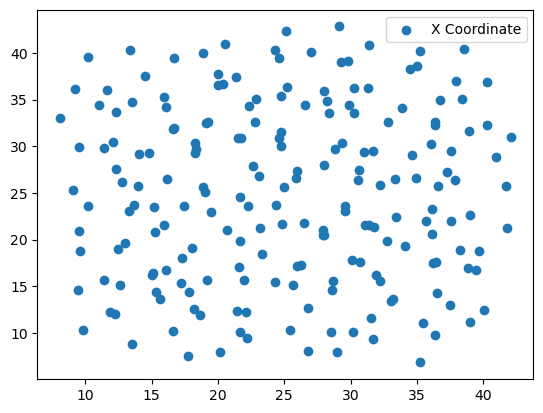

In [15]:
agent_data = results.variables.BoidsModel.iloc[-1]
print(agent_data[0])
print(agent_data[1])

# Separate the x and y coordinates
x_coords = [pos[0] for pos in agent_data]
y_coords = [pos[1] for pos in agent_data]

# Create a new figure
plt.figure()

# Plot the x and y coordinates
plt.scatter(x_coords, y_coords, label='X Coordinate')
# plt.plot(y_coords, label='Y Coordinate')

# Add a legend
plt.legend()

# Show the plot
plt.show()

[34.6302213017719, 9.026913503096424]
[28.507626482899973, 2.5775976927432884]


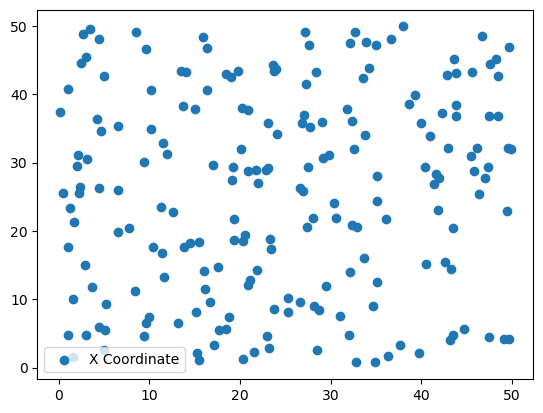

In [16]:
agent_data = results.variables.BoidsModel.iloc[0]
print(agent_data[0])
print(agent_data[1])

# Separate the x and y coordinates
x_coords = [pos[0] for pos in agent_data]
y_coords = [pos[1] for pos in agent_data]

# Create a new figure
plt.figure()

# Plot the x and y coordinates
plt.scatter(x_coords, y_coords, label='X Coordinate')
# plt.plot(y_coords, label='Y Coordinate')

# Add a legend
plt.legend()

# Show the plot
plt.show()

t
0      [15.627861691918966, 15.014377539038726]
1      [15.622145025463833, 14.014393879309909]
2       [15.419650632888885, 13.03511045712014]
3       [15.23901346668598, 12.051560654524367]
4      [15.341323749747387, 11.056808119478642]
                         ...                   
196      [16.50492926937682, 23.30416500175276]
197     [16.03148272211557, 24.184987553057166]
198     [15.566438456714396, 25.07027498164603]
199    [15.513444918638669, 26.068869836891245]
200     [15.32627423363318, 27.051197243958043]
Name: agent_0, Length: 201, dtype: object


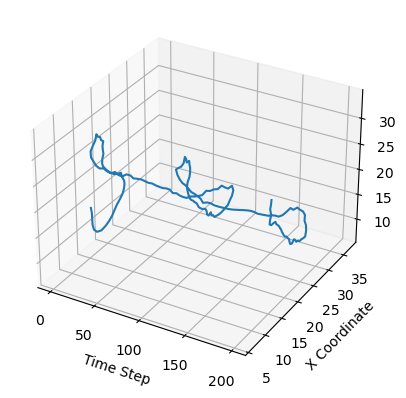

In [26]:
agent_data = results.variables.BoidsModel['agent_0'][10]
print(agent_data)

# Separate the x and y coordinates
x_coords = [pos[0] for pos in agent_data]
y_coords = [pos[1] for pos in agent_data]

# Create a list of time steps
time_steps = list(range(len(agent_data)))

# Create a new figure
fig = plt.figure()

# Create a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the x, y coordinates and time steps
ax.plot(time_steps, x_coords, y_coords)

# Set the labels
ax.set_xlabel('Time Step')
ax.set_ylabel('X Coordinate')
ax.set_zlabel('Y Coordinate')

# Show the plot
plt.show()

In [ ]:
animation_plot(BoidsModel, parameters2D)